In [1]:
import pandas as pd
import sqlite3
import gzip
import shutil
import seaborn as sns

In [2]:
conn = sqlite3.connect('unzippedData/im.db')

convert each file to csv

with gzip.open('zippedData/tn.movie_budgets.csv.gz', 'rb') as f_in:
    with open('tn.movie_budgets.csv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

unzip the imdb

import zipfile
with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('unzippedData/')

In [3]:
movie_gross = pd.read_csv('unzippedData/bom.movie_gross.csv')
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
movie_info = pd.read_csv('unzippedData/rt.movie_info.tsv', sep = '\t')
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [5]:
reviews = pd.read_csv('unzippedData/rt.reviews.tsv', sep = '\t', encoding='latin1')
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [31]:
movies = pd.read_csv('unzippedData/tmdb.movies.csv')
movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [6]:
movie_budgets = pd.read_csv('unzippedData/tn.movie_budgets.csv')
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [7]:
movie_basics = pd.read_sql("""
SELECT * 
FROM movie_basics
""", conn)

In [8]:
movie_ratings = pd.read_sql("""
SELECT * 
FROM movie_ratings
""", conn)

In [9]:
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [10]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [11]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [12]:
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.strip('$').str.replace(",","").astype(float)
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.strip('$').str.replace(",","").astype(float)
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.strip('$').str.replace(",","").astype(float)

In [13]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [51]:
movie_budgets['profit'] = movie_budgets['worldwide_gross'] - movie_budgets['production_budget']

In [52]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08


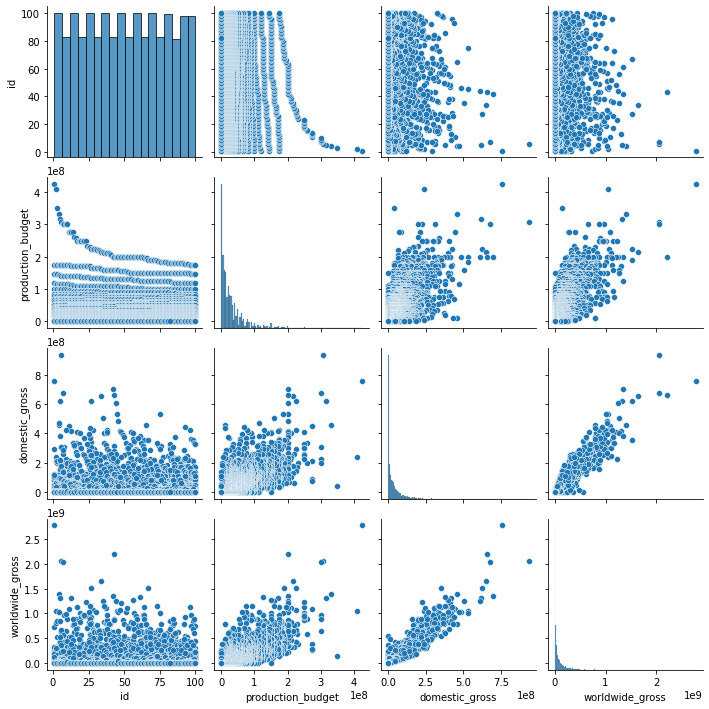

In [14]:
sns.pairplot(movie_budgets)

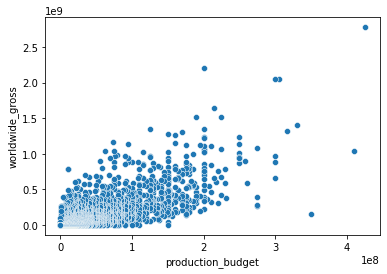

In [15]:
sns.scatterplot(data=movie_budgets, x='production_budget', y='worldwide_gross');

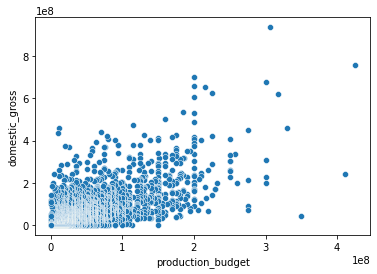

In [22]:
sns.scatterplot(data=movie_budgets, x='production_budget', y='domestic_gross');

In [36]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [37]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [137]:
mega_df = pd.read_sql("""
SELECT *
FROM
    movie_basics
    INNER JOIN movie_ratings
    USING(movie_id)
;
""", conn).merge(movie_budgets, 
                left_on = 'primary_title',
                 right_on = 'movie',
                 how = 'inner').sort_values(by='profit', ascending=False)

In [147]:
mega_df['profit'] > 100000

1279     True
2057     True
2538     True
8        True
2190     True
        ...  
2546    False
2548    False
2719    False
469     False
2816    False
Name: profit, Length: 2875, dtype: bool

In [148]:
mega_df['profit'] > 100000

1279     True
2057     True
2538     True
8        True
2190     True
        ...  
2546    False
2548    False
2719    False
469     False
2816    False
Name: profit, Length: 2875, dtype: bool

In [126]:
mega_df['genres'].value_counts()

Drama                           319
Documentary                     126
Comedy                          108
Comedy,Drama                     93
Drama,Romance                    77
                               ... 
Action,Biography,Documentary      1
Crime,Mystery,Sci-Fi              1
Comedy,Romance,Thriller           1
Adventure,Documentary             1
Action,Crime,Fantasy              1
Name: genres, Length: 311, dtype: int64

In [127]:
mega_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
1279,tt1775309,Avatar,Abatâ,2011,93.0,Horror,6.1,43,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
2057,tt2495766,Titanic,Titanic,2012,NaN,Adventure,6.2,20,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,2.008208e+09
2538,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09
8,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,1.433855e+09
2190,tt2820852,Furious 7,Furious Seven,2015,137.0,"Action,Crime,Thriller",7.2,335074,67,"Apr 3, 2015",Furious 7,190000000.0,353007020.0,1.518723e+09,1.328723e+09


In [129]:
genre_list = ['Action','Adventure', 'Comedy', 'Family', 'Crime', 'Thriller', 'Sport', 'Animation',
              'Horror', 'Fantasy', 'Romance', 'Sci-Fi', 'Documentary', 'History', 'Music',
              'Mystery', 'Drama', 'War', 'Biography', 'Musical']

for genre in genre_list:
    mega_df[genre] = mega_df['genres'].str.contains(genre)

In [130]:
mega_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,...,Romance,Sci-Fi,Documentary,History,Music,Mystery,Drama,War,Biography,Musical
1279,tt1775309,Avatar,Abatâ,2011,93.0,Horror,6.1,43,1,"Dec 18, 2009",...,False,False,False,False,False,False,False,False,False,False
2057,tt2495766,Titanic,Titanic,2012,NaN,Adventure,6.2,20,43,"Dec 19, 1997",...,False,False,False,False,False,False,False,False,False,False
2538,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,7,"Apr 27, 2018",...,False,True,False,False,False,False,False,False,False,False
8,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,34,"Jun 12, 2015",...,False,True,False,False,False,False,False,False,False,False
2190,tt2820852,Furious 7,Furious Seven,2015,137.0,"Action,Crime,Thriller",7.2,335074,67,"Apr 3, 2015",...,False,False,False,False,False,False,False,False,False,False


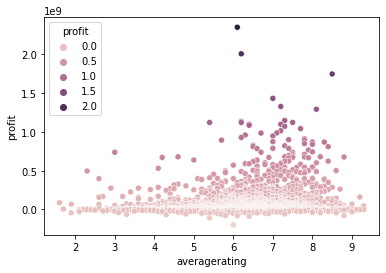

In [131]:
sns.scatterplot(data=mega_df, x='averagerating', y='profit', hue='profit');

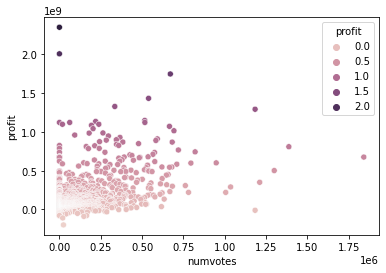

In [132]:
sns.scatterplot(data=mega_df, x='numvotes', y='profit', hue='profit');

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5

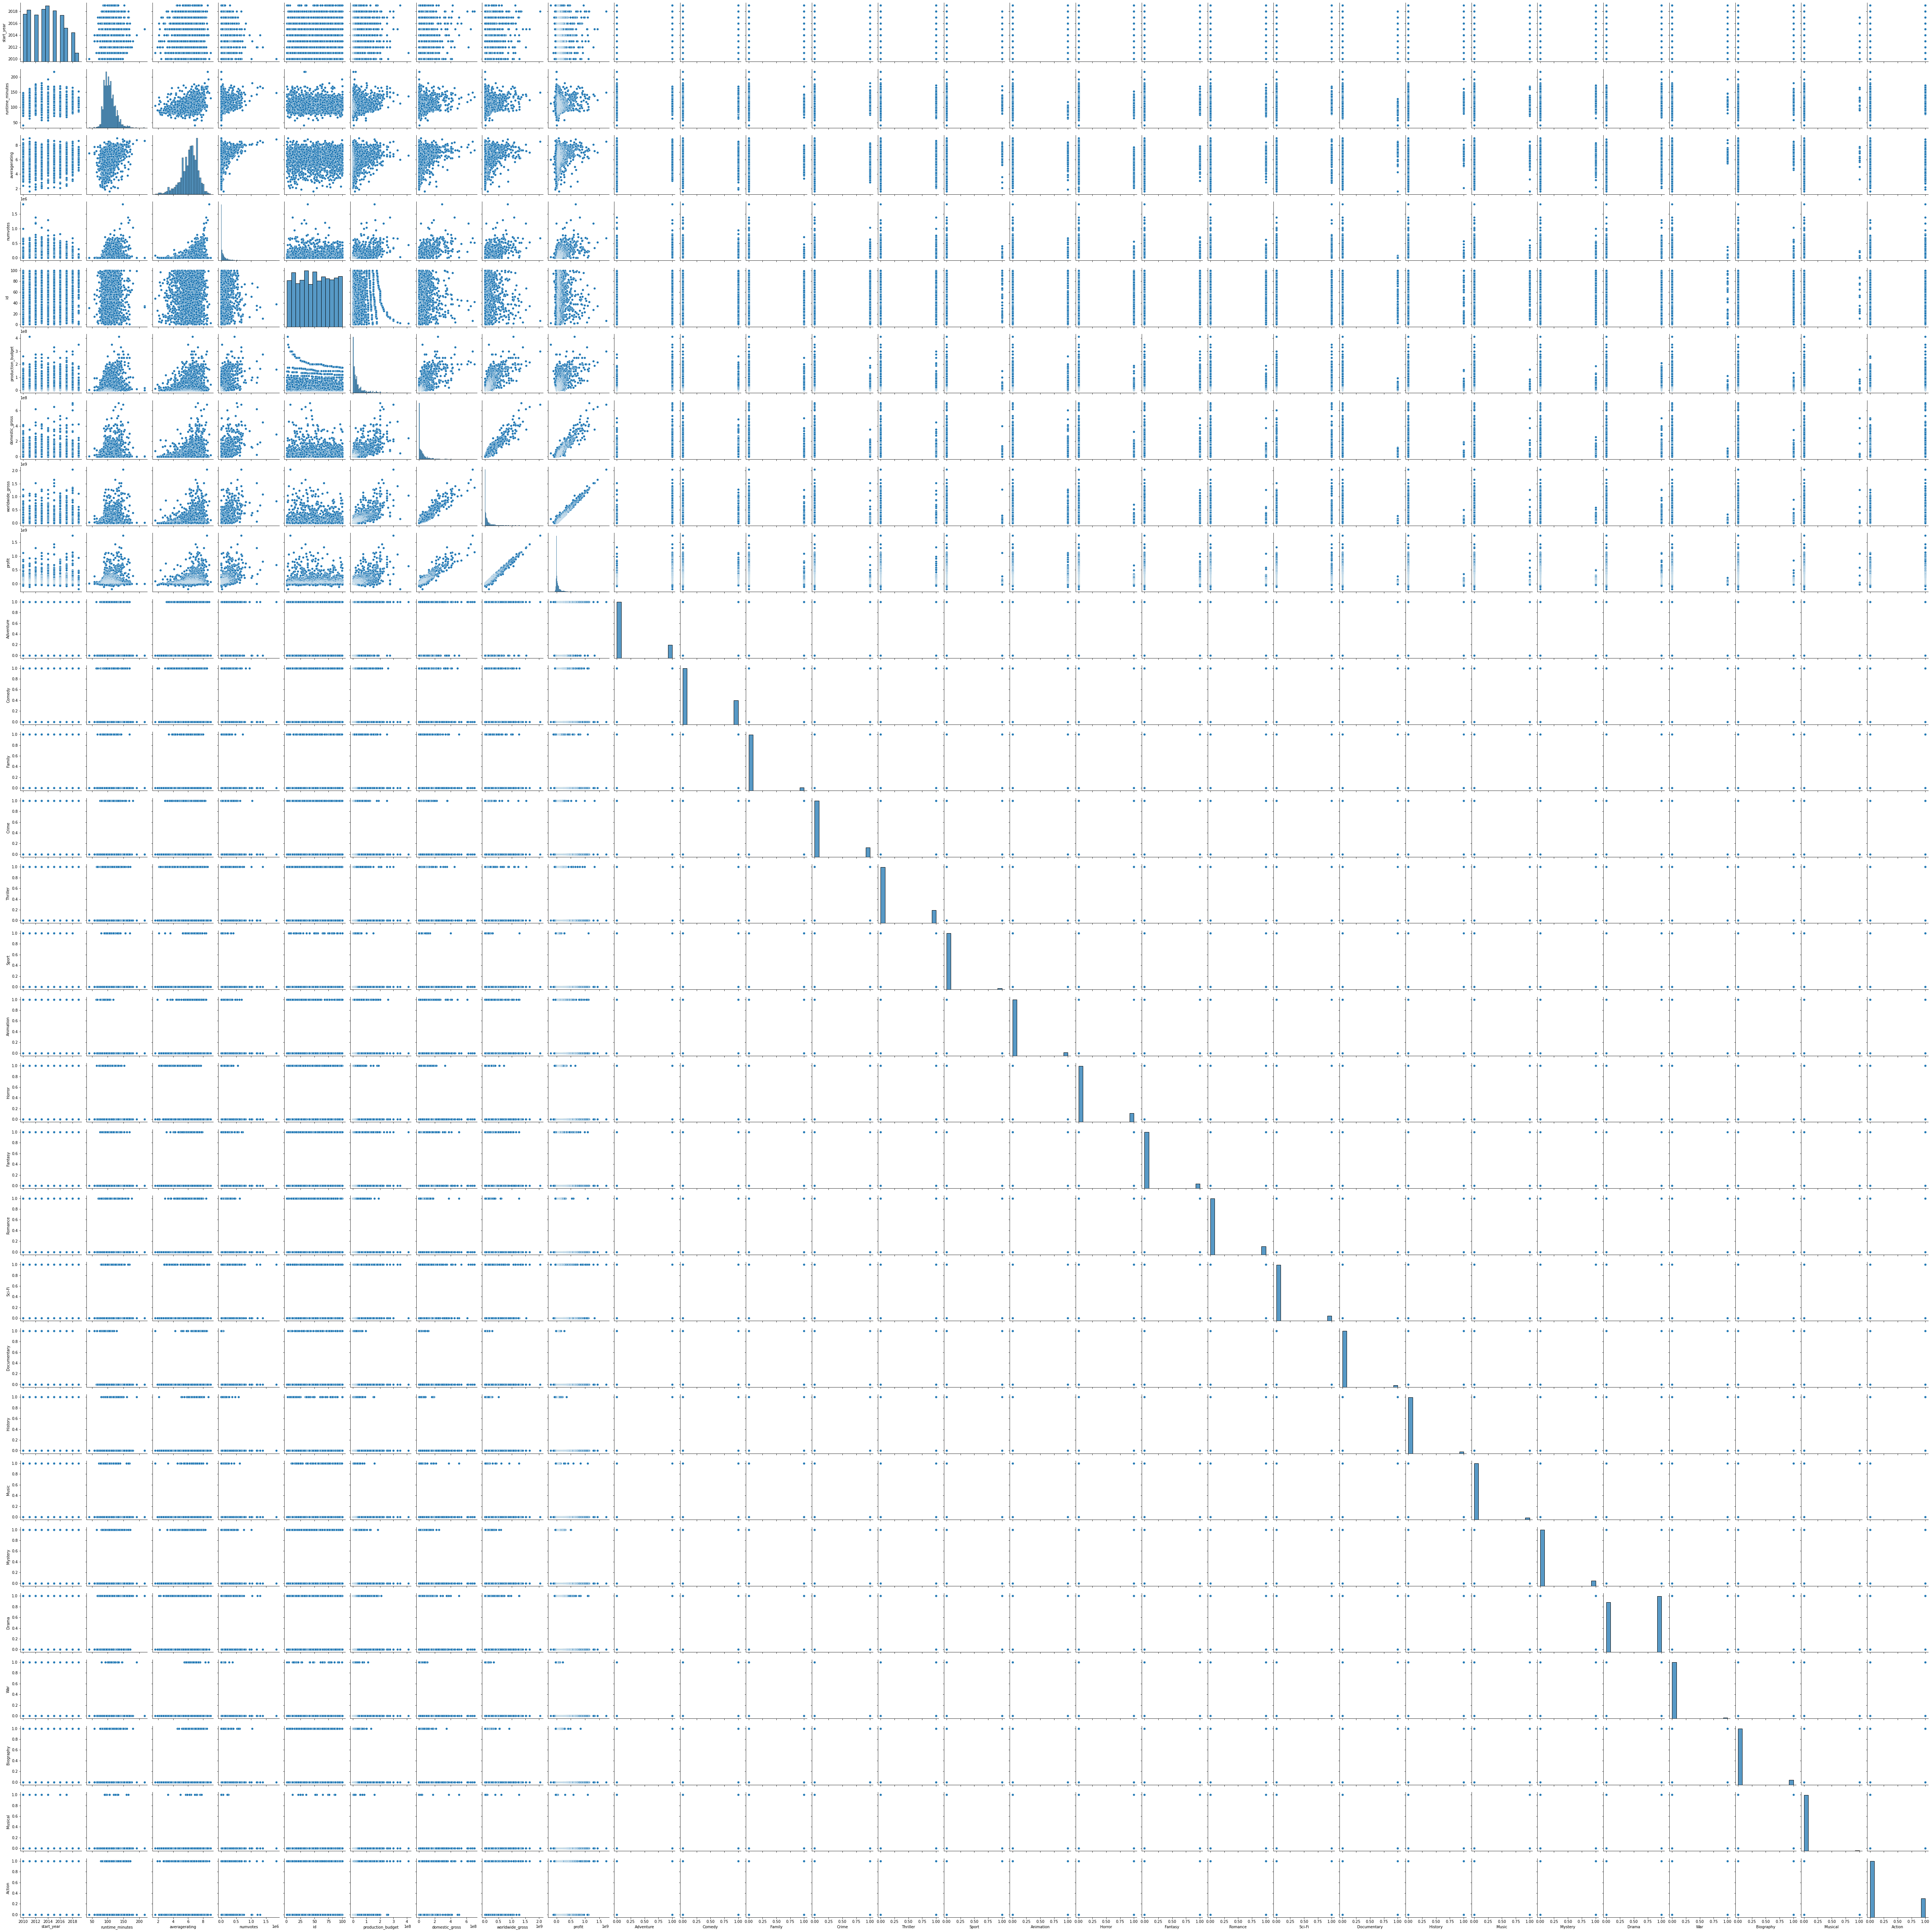

In [114]:
sns.pairplot(mega_df)

In [121]:
movie_basics[movie_basics['primary_title'] == 'Avatar']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
17060,tt1775309,Avatar,Abatâ,2011,93.0,Horror


In [124]:
movie_ratings[movie_ratings['movie_id'] == 'tt1775309']

,movie_id,averagerating,numvotes
1762,tt1775309,6.1,43


In [123]:
(mega_df['primary_title'] == 'Avatar').value_counts()

False    2231
Name: primary_title, dtype: int64

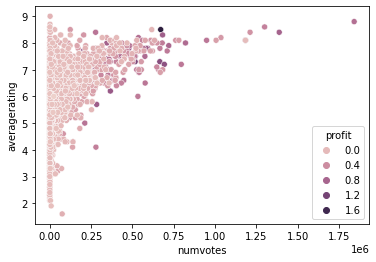

In [115]:
sns.scatterplot(data=mega_df, x='numvotes', y='averagerating', hue='profit');

In [19]:
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [20]:
movie_ratings.groupby('movie_id')['numvotes'].value_counts()

movie_id   numvotes
tt0063540  77          1
tt0066787  43          1
tt0069049  4517        1
tt0069204  13          1
tt0100275  119         1
                      ..
tt9913084  6           1
tt9914286  136         1
tt9914642  8           1
tt9914942  5           1
tt9916160  11          1
Name: numvotes, Length: 73856, dtype: int64

In [21]:
(movie_ratings['averagerating'].value_counts(normalize=True)) * 100

7.0     3.062717
6.6     3.047823
7.2     3.045115
6.8     3.031575
6.5     3.007203
          ...   
9.6     0.024372
10.0    0.021664
9.8     0.020310
9.7     0.016248
9.9     0.006770
Name: averagerating, Length: 91, dtype: float64